# Исследование данных авиакомпании — проверка гипотезы о повышении спроса во время фестивалей

Компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.

Нам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

# Сценарий по выполнению проекта

### Шаг 1. Загрузка и изучение данных<a class="tocSkip"></a> 

У нас есть файлы, в которых содержатся результаты запросов.

<b>Путь к файлам запросов 1 и 2:</b>
* <code><b>/datasets/query_1.csv</b></code><br>
* <code><b>/datasets/query_3.csv</b></code><br>

<b>Описание данных</b>
* <code><b>model</b></code> — модели самолета
* <code><b>flights_amount</b></code> — количество рейсов для каждой модели самолетов model в сентябре 2018 года
* <code><b>city</b></code> — городах
* <code><b>average_flights</b></code> — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

### Шаг 2. Проверить типы данных на корректность<a class="tocSkip"></a>

### Шаг 3. Выбрать топ-10 городов по количеству рейсов<a class="tocSkip"></a>

### Шаг 4. Построить графики и сделать выводы<a class="tocSkip"></a>

* 4.1. График - модели самолетов и количество рейсов
* 4.2. График - города и количество рейсов
* 4.3. График - ТОП-10 городов и количество рейсов

### Шаг 5. Итоговый вывод<a class="tocSkip"></a>

<hr style="border: 2px solid indigo;" />

## Шаг 1. Загрузка и изучение данных

У нас есть файлы, в которых содержатся результаты запросов.

<b>Путь к файлам запросов 1 и 2:</b>
* <code><b>/datasets/query_1.csv</b></code><br>
* <code><b>/datasets/query_3.csv</b></code><br>

<b>Описание данных</b>
* <code><b>model</b></code> — модели самолета
* <code><b>flights_amount</b></code> — количество рейсов для каждой модели самолетов model в сентябре 2018 года
* <code><b>city</b></code> — информация о городах
* <code><b>average_flights</b></code> — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

Загрузим необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Загрузим датасет <code><b>data_query_1</b></code>.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_query_1</b></code> — данные о количестве рейсов за сентябрь 2018 (запроса 1)
</div>

In [2]:
data_query_1 = pd.read_csv('query_1.csv')
display(data_query_1)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
display(data_query_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

In [4]:
display(data_query_1.columns)

Index(['model', 'flights_amount'], dtype='object')

Проверим данные на предмет дубликатов.

In [5]:
display(data_query_1.duplicated().sum())

0

Проверим данные на пропуски.

In [6]:
display(pd.concat([data_query_1.dtypes, data_query_1.isna().sum()], axis=1))

,0,1
model,object,0
flights_amount,int64,0


Посмотрим на данные всех столбцов через функцию <code><b>.describe()</b></code>

In [7]:
display(data_query_1.describe(include='all'))

,model,flights_amount
count,8,8.000000
unique,8,NaN
top,Boeing 737-300,NaN
freq,1,NaN
mean,NaN,2035.625000
std,NaN,1965.203947
min,NaN,300.000000
25%,NaN,605.250000
50%,NaN,795.000000
75%,NaN,4250.250000


Посмотрим отдельно уникальные значения по каждому столбцу.

In [8]:
# создадим простейшую функцию проверки уникальных значений
def display_unique(data, column):
    display(data[column].unique())
    display(data[column].value_counts())
    print('Всего уникальных значений:', len(data[column].unique()))

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_query_1['model']</b></code> — модели самолета
</div>

In [9]:
display_unique(data_query_1, 'model')

array(['Airbus A319-100', 'Airbus A321-200', 'Boeing 737-300',
       'Boeing 767-300', 'Boeing 777-300', 'Bombardier CRJ-200',
       'Cessna 208 Caravan', 'Sukhoi SuperJet-100'], dtype=object)

Boeing 737-300         1
Cessna 208 Caravan     1
Boeing 777-300         1
Bombardier CRJ-200     1
Airbus A319-100        1
Sukhoi SuperJet-100    1
Boeing 767-300         1
Airbus A321-200        1
Name: model, dtype: int64

Всего уникальных значений: 8


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_query_1['flights_amount']</b></code> — количество рейсов для каждой модели самолетов model в сентябре 2018 года
</div>

In [10]:
display_unique(data_query_1, 'flights_amount')

array([ 607,  960,  630,  600,  300, 4446, 4557, 4185], dtype=int64)

960     1
630     1
600     1
4185    1
300     1
4557    1
4446    1
607     1
Name: flights_amount, dtype: int64

Всего уникальных значений: 8


Загрузим датасет <code><b>data_query_3</b></code>.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_query_3</b></code> — данные о среднем количестве рейсов за день в августе 2018 года (запроса 3)
</div>

In [11]:
data_query_3 = pd.read_csv('query_3.csv')
display(data_query_3.head())

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [12]:
display(data_query_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

In [13]:
display(data_query_3.columns)

Index(['city', 'average_flights'], dtype='object')

Проверим данные на предмет дубликатов.

In [14]:
display(data_query_3.duplicated().sum())

0

Проверим данные на пропуски.

In [15]:
display(pd.concat([data_query_3.dtypes, data_query_3.isna().sum()], axis=1))

,0,1
city,object,0
average_flights,float64,0


Посмотрим на данные всех столбцов через функцию <code><b>.describe()</b></code>

In [16]:
display(data_query_3.describe(include='all'))

,city,average_flights
count,101,101.000000
unique,101,NaN
top,Грозный,NaN
freq,1,NaN
mean,NaN,5.494189
std,NaN,13.119790
min,NaN,1.000000
25%,NaN,2.000000
50%,NaN,3.000000
75%,NaN,5.870968


Посмотрим отдельно уникальные значения по каждому столбцу.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_query_3['city']</b></code> — информация о городах
</div>

In [17]:
display_unique(data_query_3, 'city')

array(['Абакан', 'Анадырь', 'Анапа', 'Архангельск', 'Астрахань',
       'Барнаул', 'Белгород', 'Белоярский', 'Благовещенск', 'Братск',
       'Брянск', 'Бугульма', 'Владивосток', 'Владикавказ', 'Волгоград',
       'Воркута', 'Воронеж', 'Геленджик', 'Горно-Алтайск', 'Грозный',
       'Екатеринбург', 'Иваново', 'Ижевск', 'Иркутск', 'Йошкар-Ола',
       'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров', 'Когалым',
       'Комсомольск-на-Амуре', 'Краснодар', 'Красноярск', 'Курган',
       'Курск', 'Кызыл', 'Липецк', 'Магадан', 'Магнитогорск', 'Махачкала',
       'Минеральные Воды', 'Мирный', 'Москва', 'Мурманск', 'Надым',
       'Нальчик', 'Нарьян-Мар', 'Нерюнгри', 'Нефтеюганск',
       'Нижневартовск', 'Нижнекамск', 'Нижний Новгород', 'Новокузнецк',
       'Новосибирск', 'Новый Уренгой', 'Норильск', 'Ноябрьск', 'Нягань',
       'Омск', 'Оренбург', 'Орск', 'Пенза', 'Пермь', 'Петрозаводск',
       'Петропавловск-Камчатский', 'Псков', 'Ростов-на-Дону', 'Салехард',
       'Самара', 'Санк

Грозный        1
Омск           1
Якутск         1
Тюмень         1
Казань         1
              ..
Новосибирск    1
Нягань         1
Владивосток    1
Псков          1
Владикавказ    1
Name: city, Length: 101, dtype: int64

Всего уникальных значений: 101


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_query_3['average_flights']</b></code> — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года
</div>

In [18]:
display_unique(data_query_3, 'average_flights')

array([  3.87096774,   1.        ,   2.16129032,   5.35483871,
         2.4516129 ,   2.61290323,   6.        ,   2.        ,
        10.        ,   3.        ,   5.12903226,   4.58064516,
         2.59090909,   1.38709677,   1.12903226,  11.32258065,
         6.03225806,   4.29032258,   7.74193548,   2.58064516,
         2.03225806,   3.16129032,   3.90322581,  11.58064516,
         3.41935484,   2.29032258,   1.27777778,   1.29411765,
         1.35714286,   4.        ,   3.29032258,   6.29032258,
       129.77419355,   3.12903226,   3.74193548,   5.87096774,
        17.32258065,   8.29032258,   5.        ,   1.59090909,
        10.12903226,   1.5483871 ,  10.19354839,  31.16129032,
         9.        ,   9.61290323,   8.74193548,   4.12903226,
         4.19354839,   6.96774194,   1.60869565,   9.58064516,
         2.87096774,   6.5483871 ,   8.41935484,   6.70967742,
         1.58064516,   4.87096774,   2.74193548,   1.32258065])

1.000000      12
2.000000       9
3.000000       7
4.000000       4
2.290323       3
6.000000       2
2.580645       2
2.612903       2
4.290323       2
2.161290       2
5.000000       2
6.032258       2
3.290323       2
3.419355       2
6.290323       2
5.870968       2
1.580645       1
10.129032      1
8.419355       1
4.870968       1
9.000000       1
7.741935       1
4.129032       1
3.903226       1
129.774194     1
1.357143       1
4.193548       1
11.322581      1
17.322581      1
9.580645       1
5.354839       1
6.967742       1
3.129032       1
9.612903       1
31.161290      1
2.741935       1
2.032258       1
1.548387       1
3.741935       1
1.387097       1
8.741935       1
3.161290       1
3.870968       1
10.193548      1
1.294118       1
6.548387       1
10.000000      1
1.322581       1
1.608696       1
1.129032       1
4.580645       1
11.580645      1
1.277778       1
2.451613       1
5.129032       1
2.590909       1
8.290323       1
6.709677       1
2.870968      

Всего уникальных значений: 60


## Шаг 2. Проверить типы данных на корректность

Исправим тип данных <code><b>data_query_3['average_flights']</b></code> на корректный (float64 заменить на тип int).

In [19]:
data_query_3['average_flights'] = data_query_3['average_flights'].astype('int')
display(data_query_3['average_flights'].head())

0    3
1    1
2    2
3    5
4    2
Name: average_flights, dtype: int32

## Шаг 3. Выбрать топ-10 городов по количеству рейсов

Сохраним в переменной <code><b>top10_cities</b></code> топ-10 городов по количеству рейсов.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>top10_cities</b></code> — топ-10 городов по количеству рейсов
</div>

In [20]:
top10_cities = data_query_3.sort_values(by='average_flights', ascending=False).head(10)
display(top10_cities)

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


## Шаг 4. Построить графики и сделать выводы

### 4.1. График - модели самолетов и количество рейсов

Построим график количества рейсов в зависимости от модели самолета.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>model_flights_amount</b></code> — количество рейсов в зависимости от модели самолета
</div>

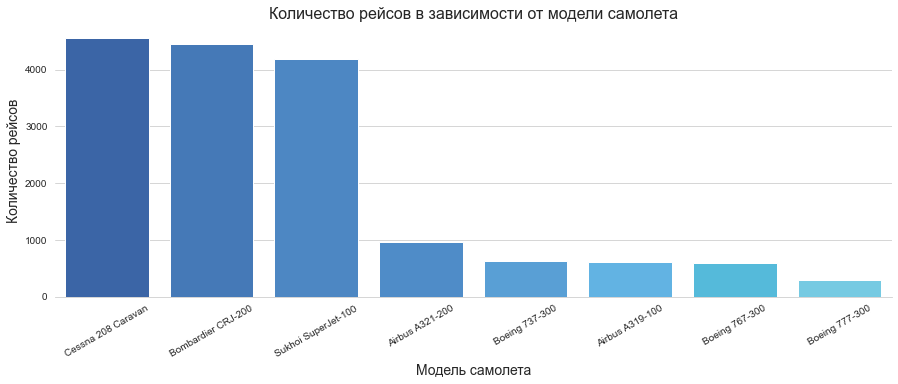

In [21]:
model_flights_amount = data_query_1.sort_values(by='flights_amount', ascending=False)

palette = ['#2961b8ff', '#3277caff', '#3987D7', '#3b8cdcff', '#44a2eaff', '#4db8f8ff', '#3fc5f0ff', '#64d4f4ff', '#7ddbf6ff', '#96e2f8ff']

sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
plt.title('Количество рейсов в зависимости от модели самолета', fontsize=16)
sns.barplot(x='model', y='flights_amount', data=model_flights_amount, label="line", palette=palette)
sns.despine(left=True)
plt.xlabel('Модель самолета', fontsize=14)
plt.ylabel('Количество рейсов', fontsize=14)
plt.xticks(rotation=30)
plt.show()

<div style="border-radius: 15px; border: 3px solid green; padding: 15px;">
<font color='green'><b>ВЫВОД:</b></font><br>
На графике "Количество рейсов в зависимости от модели самолета" выявлена следующая зависимость:
<br>

Топ-3 со значительным отрывом от остальных заняли модели самолетов <code><b>Cessna 208 Caravan</b></code>, <code><b>Bombardier CRJ-200</b></code>, и <code><b>Sukhoi Superjet-100</b></code>. Этому есть объяснение в виде дальности перелета. Данные модели самолетов имеет среднюю дальность около 2000 км и в отличие от остальных не большой потенциал вместимости пассажиров. Перелеты совершаются на внутренних (локальных направлениях), поэтому их расстояние не большое, а переодичность высокая.
<br> 

Остальные модели рассчитаны на далекие перелеты например Москва - Новосибирск - Владивосток.<br>
    
</div>

### 4.2. График - города и количество рейсов

Построим график количества рейсов в зависимости от города.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>city_average_flights</b></code> — количество рейсов в зависимости от города
</div>

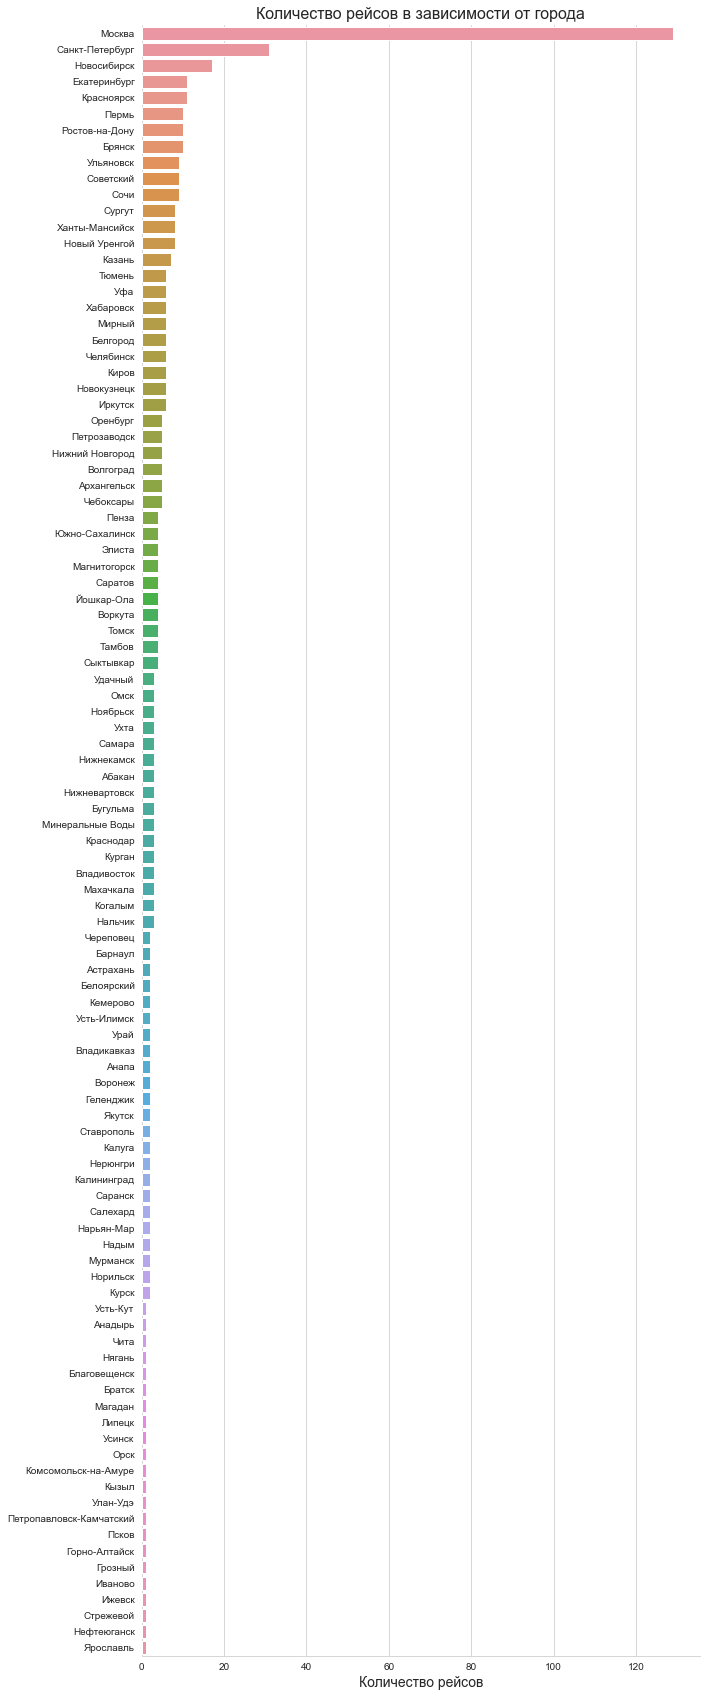

In [22]:
city_average_flights = data_query_3.sort_values(by='average_flights', ascending=False)

plt.figure(figsize=(10, 30))
plt.title('Количество рейсов в зависимости от города', fontsize=16)
sns.barplot(x='average_flights', y='city', data=city_average_flights)
sns.despine(left=True)
plt.ylabel('')
plt.xlabel('Количество рейсов', fontsize=14)
plt.show()

<div style="border-radius: 15px; border: 3px solid green; padding: 15px;">
<font color='green'><b>ВЫВОД:</b></font><br>
На графике "Количество рейсов в зависимости от города" выявлена следующая зависимость:
<br>

Популярными городами являются <code><b>Москва</b></code>, <code><b>Санкт-Петербург</b></code> и <code><b>Новосибирск</b></code>. Прежде всего это города милионники и они являются важными воздушнотранспортными узлами, где можно пересесть на международный рейс или стыковочный.<br> 
    
</div>

### 4.3. График - ТОП-10 городов и количество рейсов

Построим график ТОП-10 городов по количеству рейсов.

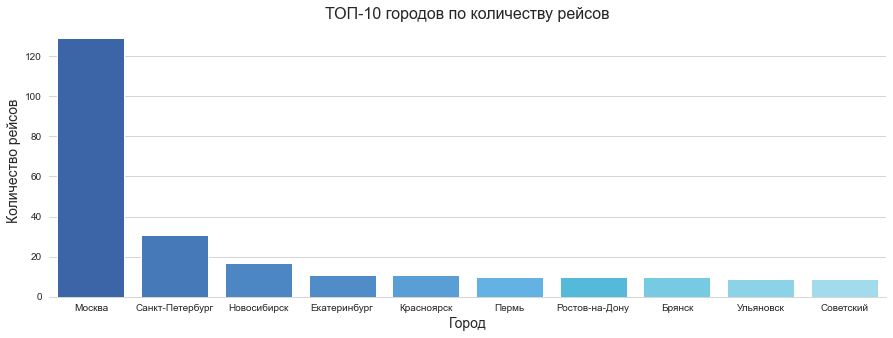

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
plt.title('ТОП-10 городов по количеству рейсов', fontsize=16)
sns.barplot(x='city', y='average_flights', data=top10_cities, palette=palette)
sns.despine(left=True)
plt.xlabel('Город', fontsize=14)
plt.ylabel('Количество рейсов', fontsize=14)
plt.show()

<div style="border-radius: 15px; border: 3px solid green; padding: 15px;">
<font color='green'><b>ВЫВОД:</b></font><br>
На графике "ТОП-10 городов по количеству рейсов" выявлена следующая зависимость:
<br>

Москва занимает первое место за счет большего количества аэропортов, чем у остальных городов, а также по соображениям экономическим и геополитическим. Это столица.
<br>

Кроме этого Москва, Санкт-Петербург, Новосибирск являются важными воздушними узлами для международных полетов. Большинство перелетов в этот город происходят из-за пересадки на другой рейс для полета за границу.<br>
    
</div>

<hr style="border: 2px solid indigo;" />

## Шаг 5. Итоговый вывод

<div style="border-radius: 15px; border: 3px solid green; padding: 15px;">
<font color='green'><b>ВЫВОД:</b></font><br>
Была проведена проверка и анализ данных, сформированных по результатам SQL запросов.
<br>

Было ожидаемо, что больше всего полетов будет в Москве и Санкт-Петербурге, так как они крупные города в России. Указанные модели самолетов говорят о том, какой воздушный парк популярен в стране. Ещё раз напомним, что модель самолета имеет прямую корреляцию с количеством перелетов и расстоянием.<br>
    
</div>